In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import seaborn

from matplotlib import rc

In [2]:
nodelist=np.array([1,2,4,8,16])
workers_per_node = 48
filepath="/home/felipe/lookahead-study/models/MJP/Testresults/"
datalist=[]

for i in range(len(nodelist)):
    datalist.append(pd.read_csv(
        os.path.join(filepath, "MJPruntimeresultsN"+str(nodelist[i])+".txt"),
        delimiter = ", ", engine = 'python'))

data1worker=pd.read_csv(os.path.join(filepath, "MJPruntimeresultsN0.txt"), delimiter = ", ", engine = 'python')

data1worker['Runtime Expectation']=0.5*data1worker['Runtime Expectation']

pop_sizes = datalist[0].loc[datalist[0]['Look_ahead']==True]['Pop size'].values
meanslist = []

for i in range(len(nodelist)):
    meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']==True]['Runtime Expectation'].values)
    meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']==False]['Runtime Expectation'].values)


In [3]:
PPParray=np.zeros((len(nodelist),len(pop_sizes)))
ORIarray=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(len(nodelist)):
    PPParray[i,:]=meanslist[2*i]
    ORIarray[i,:]=meanslist[2*i+1]
    

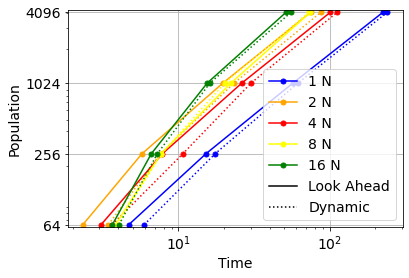

In [4]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}
rc('font', **font)

colors=["blue", "orange" ,"red", "yellow", "green", "purple"]

#plt.plot(PPParray[0,:],pop_sizes,label=str(nodes[0])+" Cores", marker="o", markersize=5, color=colors[0])

for i in range(0,len(nodelist)):
    plt.plot(PPParray[i,:],pop_sizes,label=str(nodelist[i])+" N", marker="o", markersize=5, color=colors[i])
    plt.plot(ORIarray[i,:],pop_sizes, marker="o", markersize=5, color = colors[i], linestyle="dotted")
    #plt.plot(Statarray[i,:],pop_sizes, marker="o", markersize=5, color = colors[i], linestyle="dashed")

plt.plot([0],[10], label="Look Ahead", color = "black")

plt.plot([0],[10], label="Dynamic", color = "black", linestyle = "dotted")
    
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.ylabel("Population")
plt.yticks(pop_sizes,pop_sizes)
plt.xscale('log')
plt.xlabel("Time")
plt.ylim(0.95*pop_sizes[0],1.05*pop_sizes[-1])
plt.savefig("/home/felipe/MTGraphics/MJPCores_PopRuntime.pdf")
plt.show()

In [6]:
pop_sizes_1=pop_sizes[0:-1]

means1PPP = data1worker.loc[data1worker['Look_ahead']==True]['Runtime Expectation'].values
means1PPP = np.append(means1PPP, 4*means1PPP[-1])

par_efficiency=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(0,len(nodelist)):
    for j in range(0,len(pop_sizes)):
        par_efficiency[i,j]=means1PPP[j]/(PPParray[i,j]*nodelist[i]*workers_per_node)

par_efficiency_ori=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(0,len(nodelist)):
    for j in range(0,len(pop_sizes)):
        par_efficiency_ori[i,j]=means1PPP[j]/(ORIarray[i,j]*nodelist[i]*workers_per_node)


<ipython-input-8-939f14b16ef3>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),


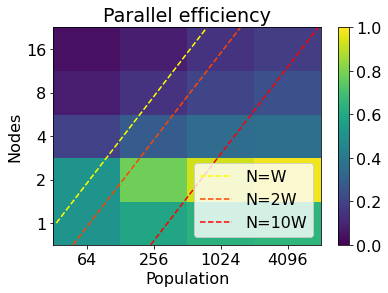

In [8]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}
rc('font', **font)
y = np.array([math.sqrt(2),2,4,8,16,32])
y1=np.append(1,y)
y2=y1[:]

kekse=np.zeros((len(nodelist)+1,len(pop_sizes)+1))
kekse[:-1,:-1]=par_efficiency
fig, ax = plt.subplots()
im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),
                   kekse, vmin=0, vmax=1)
fig.colorbar(im)

plt.plot(workers_per_node*y,y, color="yellow", linestyle="dashed", label="N=W")
plt.plot(workers_per_node*2*np.array(y1),y1, color="orangered", linestyle="dashed", label="N=2W")
plt.plot(workers_per_node*10*np.array(y2),y2, color="red", linestyle="dashed", label="N=10W")
plt.legend(loc=4)
plt.xscale('log')
plt.xlabel("Population")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=2*pop_sizes[-1]
plt.xticks(tick_locs_x,pop_sizes)

plt.yscale('log')
plt.ylabel("Nodes")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks(math.sqrt(2)*nodelist,nodelist)
ax.axis('tight')
plt.title('Parallel efficiency')
plt.xlim(xmin=64,xmax=16384)

plt.savefig("/home/felipe/MTGraphics/MJPParallelEff.pdf")
plt.show()

<ipython-input-9-af80c3785eff>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),


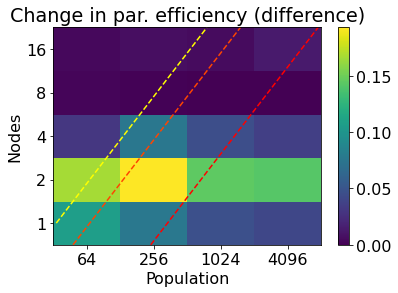

In [9]:
vmax=None
diff = np.zeros((len(nodelist)+1,len(pop_sizes)+1))
diff[:-1,:-1] = par_efficiency-par_efficiency_ori
fig, ax = plt.subplots()
im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),
                   diff, vmin=0, vmax=vmax)
fig.colorbar(im)
plt.plot(workers_per_node*y,y, color="yellow", linestyle="dashed", label="Pop=Nodes")
plt.plot(workers_per_node*2*np.array(y1),y1, color="orangered", linestyle="dashed", label="Pop=2*Nodes")
plt.plot(workers_per_node*10*np.array(y2),y2, color="red", linestyle="dashed", label="Pop=10*Nodes")
plt.xscale('log')
plt.xlabel("Population")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=2*pop_sizes[-1]
plt.xticks(tick_locs_x,pop_sizes)

plt.yscale('log')
plt.ylabel("Nodes")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks(math.sqrt(2)*nodelist,nodelist)
plt.title('Change in par. efficiency (difference)')
plt.xlim(xmin=64,xmax=16384)

plt.savefig("/home/felipe/MTGraphics/MJPChangeinParEffVar.pdf")
plt.show()

<ipython-input-10-92290a5c8712>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),


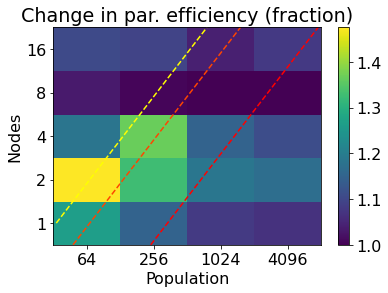

In [10]:
vmax=None

frac = np.zeros((len(nodelist)+1,len(pop_sizes)+1))
frac[:-1,:-1] = par_efficiency/par_efficiency_ori

fig, ax = plt.subplots()
im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),
                   frac, vmin=1, vmax=vmax)

fig.colorbar(im)
plt.plot(workers_per_node*y,y, color="yellow", linestyle="dashed", label="Pop=Workers")
plt.plot(workers_per_node*2*np.array(y1),y1, color="orangered", linestyle="dashed", label="Pop=2*Workers")
plt.plot(workers_per_node*10*np.array(y2),y2, color="red", linestyle="dashed", label="Pop=10*Workers")
plt.xscale('log')
plt.xlabel("Population")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=2*pop_sizes[-1]
plt.xticks(tick_locs_x,pop_sizes)

plt.yscale('log')
plt.ylabel("Nodes")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks(math.sqrt(2)*nodelist,nodelist)
plt.title('Change in par. efficiency (fraction)')
plt.xlim(xmin=64,xmax=16384)

plt.savefig("/home/felipe/MTGraphics/MJPChangeinParEffFrac.pdf")
plt.show()

In [ ]:
seaborn.heatmap(par_efficiency, xticklabels=pop_sizes, yticklabels=nodelist)

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

ax = axes[0]
seaborn.heatmap(par_efficiency-par_efficiency_ori, xticklabels=pop_sizes, yticklabels=nodelist,ax=ax)

ax = axes[1]
seaborn.heatmap(par_efficiency/par_efficiency_ori, xticklabels=pop_sizes, yticklabels=nodelist,ax=ax)
